In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from sklearn.model_selection import train_test_split
import wrangle_g as wr

In [2]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-notebook')

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
df = pd.read_csv('lang_data_prepped.csv',index_col=False)

In [5]:
df.head()

,repo,language,readme_contents,stopped
0,ujjwalkarn/DataScienceR,R,# R Data Science Tutorials\n- This repo contai...,data science tutorials repo contain curated li...
1,IndrajeetPatil/ggstatsplot,R,---\noutput: github_document\n---\n\n <!-- RE...,output githubdocument readmemd generate readme...
2,easystats/easystats,R,"---\noutput: github_document\n---\n\n```{r, wa...",output githubdocument warningfalse messagefals...
3,seandavi/sars2pack,R,---\noutput: \n - rmarkdown::github_document\...,output rmarkdowngithubdocument rmarkdownhtmldo...
4,markvanderloo/lumberjack,R,## Track changes in data\n[![Build Status](htt...,track change data build statushttpstravisciorg...


In [6]:
df.iloc[10,3]

'statisticallearningtechniques statistical learn repository consist various learn algorithms implementation depth interpretation link implementation indepth explanation learn algorithms document contain underlie mathematical concepts explain respect simple case study topics cover 1 supervise learn 2 model selection techniques aic bic mallows cp adjust rsquared cross validation error 3 shrinkage methods regularization techniques ridge regression lasso l1 norm l2 norm 4 nonlinear regression parametric model 5 nonparametric model knearest neighbor algorithm 6 tree base model decision tree 7 bayesian model technique naive bay algorithm 8 ensemble learn random forest gradient boost bag 9 resampling methods cross validation 10 unsupervised learn first document publish polynomial regression tecnhiques add non linearities model make model learn non linear function httprpubscomanish20polynomialregression second document step step implementation cubic splines smooth splines transform variables a

In [7]:
train, validate, test = wr.final_wrangle(df)

In [8]:
train.shape[0],validate.shape[0],test.shape[0]

(162, 70, 59)

In [9]:
train

,repo,language,readme_contents,stopped
117,storieswithsiva/US-Job-Market-Analysis,R,# US Job Analysis in R\n[![Makes people smile]...,us job analysis make people smilehttpsfortheba...
8,adityashrm21/Bike-Sharing-Demand-Kaggle,R,# Bike-Sharing-Demand---Kaggle\n\nSolution to ...,bikesharingdemandkaggle solution kaggle knowle...
63,Sarah-Hesham-2022/Bio-Statistics-R-Coding-On-D...,R,# Bio-Statistics-R-Coding-On-Datasets-Analysis...,biostatisticsrcodingondatasetsanalysisandplott...
268,Tech-Matt/game_of_life,Python,# Game of Life\n\n## Premise\nThis is the firs...,game life premise first readme im write projec...
105,vincenzorusso3/tesi-triennale,R,# PPMI Research\nThe main goal is to create a ...,ppmi research main goal create system order cl...
...,...,...,...,...
225,VivanVatsa/Data-Science-Salary-Estimator,Python,# Data-Science-Salary-Estimator\n>> `BEST WITH...,datasciencesalaryestimator best lightmode fork...
16,thierrygosselin/assigner,R,---\noutput: github_document\n---\n\n\n# assig...,output githubdocument assigner hrefhttpthierry...
28,stasvlasov/nstandr,R,"# nstandr <img src=""img/logo.png"" align=""right...",nstandr img srcimglogopng alignright alt width...
33,alibalapour/CovidPlot19,R,---\noutput: github_document\nalways_allow_htm...,output githubdocument alwaysallowhtml true rea...


## Create length of README col

In [56]:
len((''.join(train['stopped'])).split())

41896

In [65]:
train['token_cnt'] = len((''.join(train.iloc[3]['stopped'])).split())

train.head()

,repo,language,readme_contents,stopped,token_cnt
117,storieswithsiva/US-Job-Market-Analysis,R,# US Job Analysis in R\n[![Makes people smile]...,us job analysis make people smilehttpsfortheba...,125
8,adityashrm21/Bike-Sharing-Demand-Kaggle,R,# Bike-Sharing-Demand---Kaggle\n\nSolution to ...,bikesharingdemandkaggle solution kaggle knowle...,125
63,Sarah-Hesham-2022/Bio-Statistics-R-Coding-On-D...,R,# Bio-Statistics-R-Coding-On-Datasets-Analysis...,biostatisticsrcodingondatasetsanalysisandplott...,125
268,Tech-Matt/game_of_life,Python,# Game of Life\n\n## Premise\nThis is the firs...,game life premise first readme im write projec...,125
105,vincenzorusso3/tesi-triennale,R,# PPMI Research\nThe main goal is to create a ...,ppmi research main goal create system order cl...,125


In [66]:
train.tail()

,repo,language,readme_contents,stopped,token_cnt
225,VivanVatsa/Data-Science-Salary-Estimator,Python,# Data-Science-Salary-Estimator\n>> `BEST WITH...,datasciencesalaryestimator best lightmode fork...,125
16,thierrygosselin/assigner,R,---\noutput: github_document\n---\n\n\n# assig...,output githubdocument assigner hrefhttpthierry...,125
28,stasvlasov/nstandr,R,"# nstandr <img src=""img/logo.png"" align=""right...",nstandr img srcimglogopng alignright alt width...,125
33,alibalapour/CovidPlot19,R,---\noutput: github_document\nalways_allow_htm...,output githubdocument alwaysallowhtml true rea...,125
135,AmoDinho/datacamp-python-data-science-track,Python,# Data Camp: Data Scientist with Python 🎉🤖\n\n...,data camp data scientist githubhttpsimgshields...,125


## df's and _words list

In [10]:
r_df = train[train.language=='R']
python_df = train[train.language=='Python']

In [11]:
r_words = ' '.join(r_df['stopped']).split()

In [12]:
len(r_words)

13052

In [13]:
python_words = ' '.join(python_df['stopped']).split()

In [24]:
r_words.split()

['us',
 'job',
 'analysis',
 'make',
 'people',
 'smilehttpsforthebadgecomimagesbadgesmakespeoplesmilesvghttpsgithubcomiamsivab',
 'hitcounthttphitsdwylcomiamsivabusjobmarketanalysissvghttphitsdwylcomiamsivabusjobmarketanalysis',
 'us',
 'job',
 'analysis',
 'generic',
 'badgehttpsimgshieldsiobadgetextminingtealsvgstyleforthebadgehttpsgithubcomiamsivabusjobmarketanalysis',
 'generic',
 'badgehttpsimgshieldsiobadgelinkedinconnectbluesvgstyleforthebadgelogolinkedinlogocolorwhitehttpswwwlinkedincominiamsivab',
 'generic',
 'badgehttpsimgshieldsiobadgerlanguagebluesvgstyleforthebadgehttpsgithubcomiamsivabusjobmarketanalysis',
 'forthebadge',
 'usesgithttpforthebadgecomimagesbadgesusesgitsvghttpsgithubcom',
 'project',
 'contain',
 'analysis',
 'datahttpsdownloadblsgovpubtimeserieslaladata1currents',
 'timeserieshttpsgithubcomiamsivabusjobmarketanalysis',
 'apply',
 'time',
 'series',
 'prediction',
 'github',
 'repo',
 'sizehttpsimgshieldsiogithubreposizeiamsivabusjobmarketanalysissvglogog

In [14]:
len(python_words)

29005

In [15]:
all_words = ' '.join(train['stopped']).split()

In [16]:
len(all_words)

42057

In [17]:
len(all_words) - len(python_words)

13052

In [18]:
r_freq = pd.Series(r_words).value_counts()

In [19]:
r_freq.head(10)

data                260
use                 191
model               111
package             102
function            100
microelectronics     96
analysis             71
sgsthomson           71
project              63
plot                 58
dtype: int64

In [20]:
python_freq = pd.Series(python_words).value_counts()

In [21]:
python_freq.head(10)

data       498
use        348
str        170
file       168
run        168
model      166
install    164
return     146
import     121
learn      108
dtype: int64

In [22]:
all_freq = pd.Series(all_words).value_counts()

In [23]:
all_freq.head(10)

data        758
use         539
model       277
file        213
install     190
run         185
str         170
project     170
function    152
learn       150
dtype: int64

## freq's in a df

In [24]:
# concat all frequencies together into a dataframe
word_counts = pd.concat([r_freq, python_freq,all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['r','python','all']
word_counts.head()

,r,python,all
data,260,498,758
use,191,348,539
model,111,166,277
package,102,35,137
function,100,52,152


In [25]:
word_counts[(word_counts['r'] == 0)&(word_counts['python'] >= 100)]

,r,python,all
str,0,170,170


## Python words

In [26]:
word_counts[(word_counts['r'] == 0)]

,r,python,all
str,0,170,170
yyyymmdd,0,59,59
modin,0,52,52
div,0,51,51
pandas,0,51,51
...,...,...,...
srchttpsgithubcompyresearchpyresearchblobmainpyresearchjpega,0,1,1
hrefhttpsultralyticscomyolov8,0,1,1
anuranroy02,0,1,1
repositoryhttpsgithubcomanuranroyserpytor,0,1,1


In [31]:
word_counts[(word_counts['r'] == 0)&(word_counts['python'] >= 10)].head(60)

,r,python,all
str,0,170,170
yyyymmdd,0,59,59
modin,0,52,52
div,0,51,51
pandas,0,51,51
int,0,48,48
ludwig,0,48,48
key,0,46,46
sql,0,44,44
optional,0,44,44


In [37]:
python_only = word_counts[(word_counts['r'] == 0)&(word_counts['python'] >= 10)]

## R words

In [28]:
word_counts[(word_counts['python'] == 0)]

,r,python,all
microelectronics,96,0,96
sgsthomson,71,0,71
sgsthomsonmicroelectronic,52,0,52
sushi,35,0,35
sgs,32,0,32
...,...,...,...
dat,1,0,1
getmirconn,1,0,1
mir,1,0,1
hsalet7g,1,0,1


In [29]:
word_counts[(word_counts['python'] == 0)&(word_counts['r'] >= 50)]

,r,python,all
microelectronics,96,0,96
sgsthomson,71,0,71
sgsthomsonmicroelectronic,52,0,52


In [30]:
word_counts[(word_counts['python'] == 0)&(word_counts['r'] >= 10)].head(60)

,r,python,all
microelectronics,96,0,96
sgsthomson,71,0,71
sgsthomsonmicroelectronic,52,0,52
sushi,35,0,35
sgs,32,0,32
srl,32,0,32
thomson,30,0,30
olive,24,0,24
width50,23,0,23
multipolygon,22,0,22


In [36]:
r_only = word_counts[(word_counts['python'] == 0)&(word_counts['r'] >= 10)]

## Graphs

<AxesSubplot:>

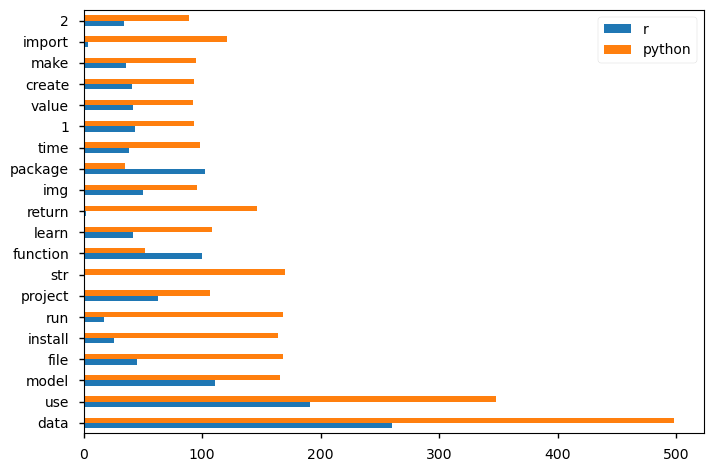

In [33]:
word_counts.sort_values('all', ascending=False
                       )[['r','python']].head(20).plot.barh()

<AxesSubplot:>

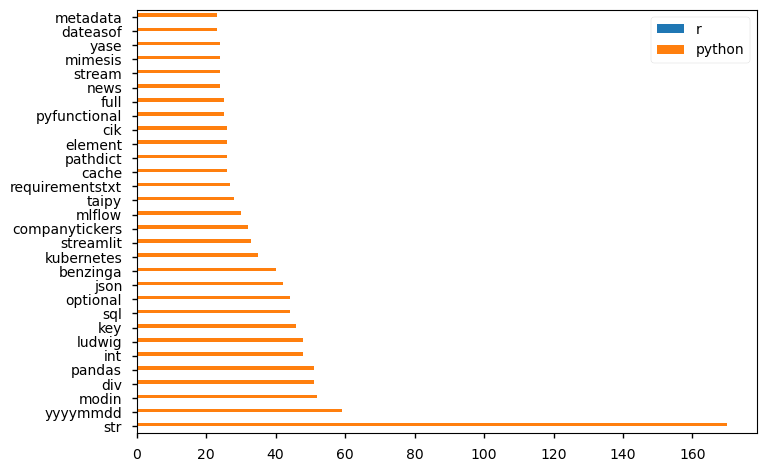

In [40]:
python_only.sort_values('all', ascending=False
                       )[['r','python']].head(30).plot.barh()

<AxesSubplot:>

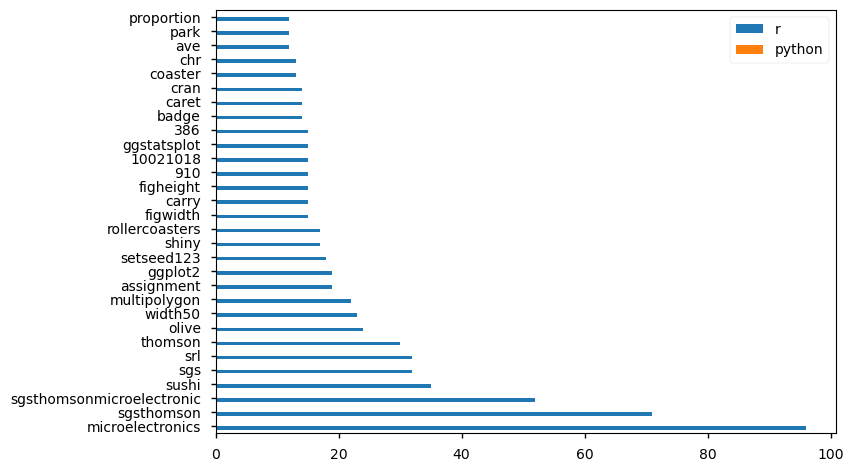

In [41]:
r_only.sort_values('all', ascending=False
                       )[['r','python']].head(30).plot.barh()

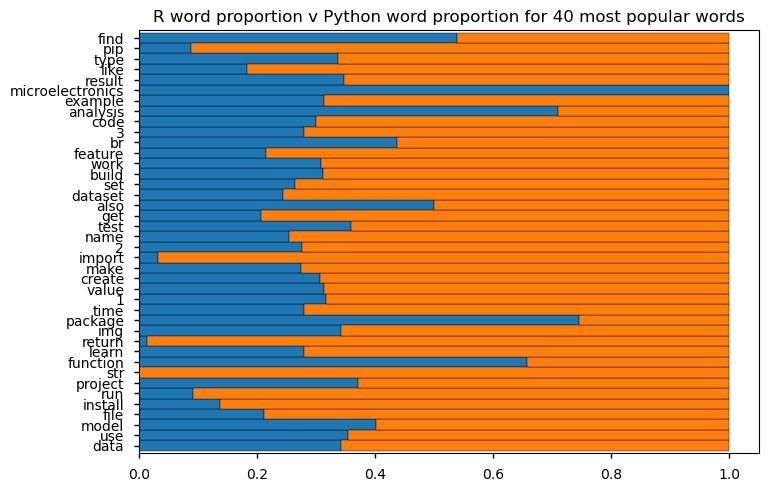

In [47]:
word_counts.sort_values('all', ascending=False
                       ).head(40).apply(
    lambda row: row/row['all'], axis=1
)[['r','python']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1).set(title='R word proportion v Python word proportion for 40 most popular words');

## Bigrams

## R

<AxesSubplot:>

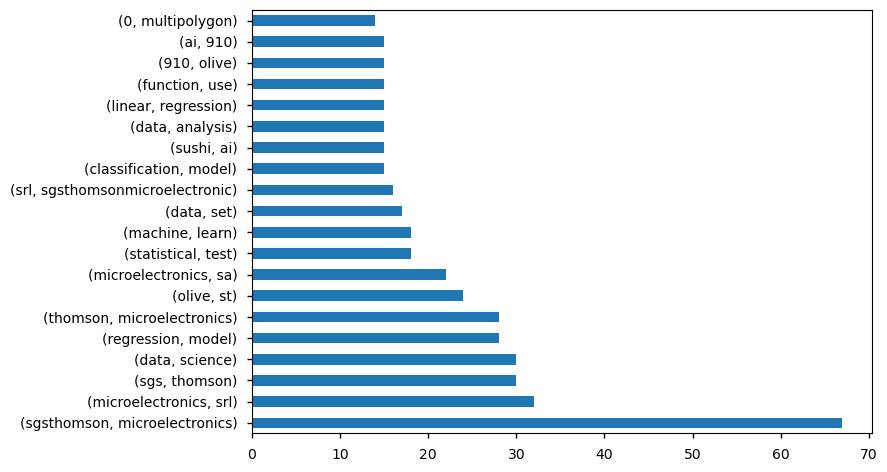

In [48]:
pd.Series(nltk.bigrams(r_words)).value_counts().head(20).plot.barh()

## Python

<AxesSubplot:>

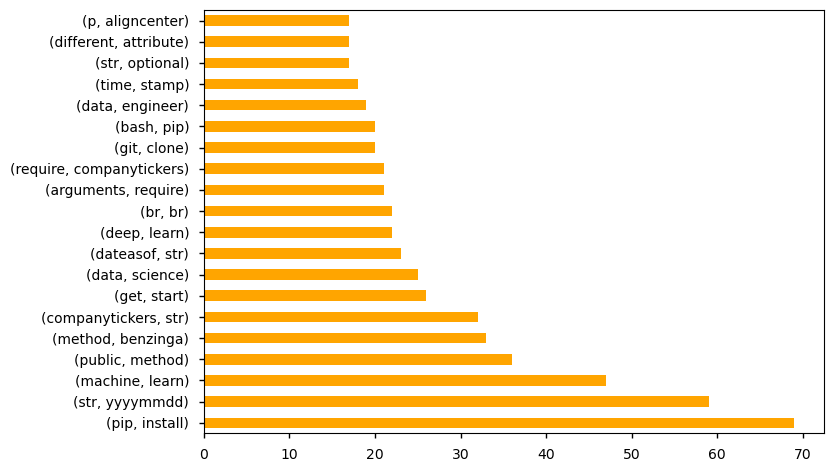

In [51]:
pd.Series(nltk.bigrams(python_words)).value_counts().head(20).plot.barh(color='orange')

## Trigrams

## R

<AxesSubplot:>

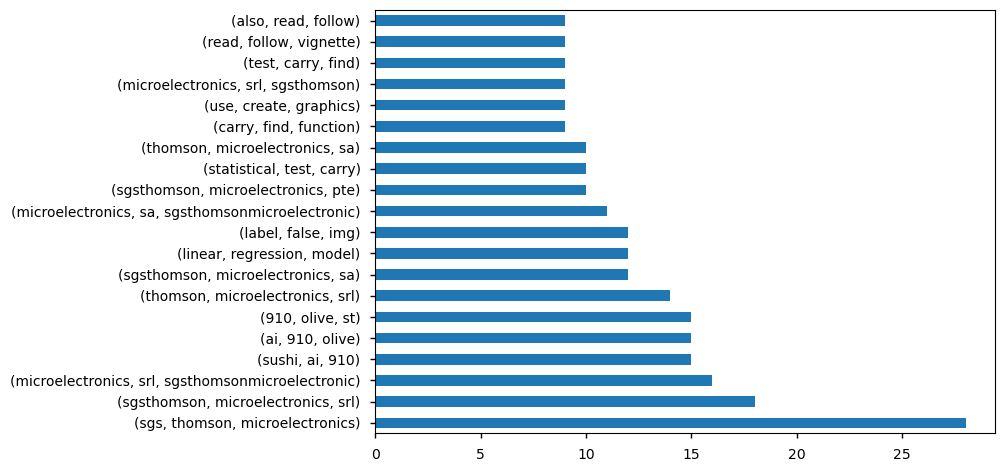

In [52]:
pd.Series(nltk.ngrams(r_words,3)).value_counts().head(20).plot.barh()

## Python

<AxesSubplot:>

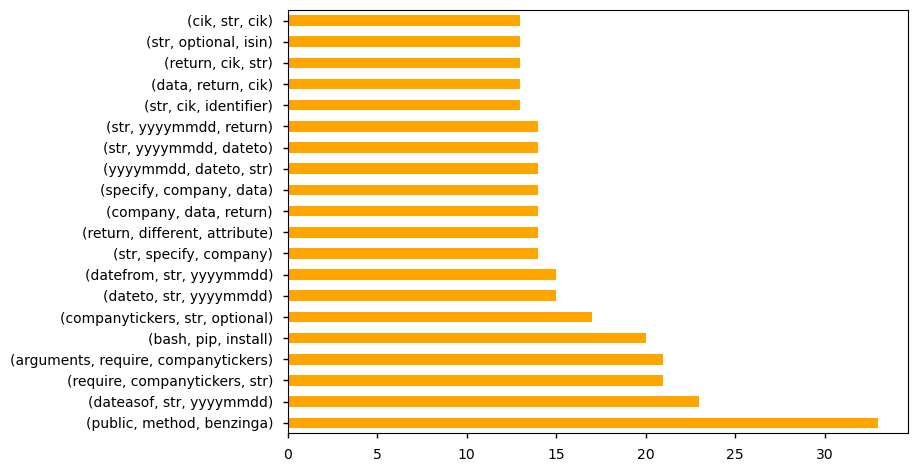

In [53]:
pd.Series(nltk.ngrams(python_words,3)).value_counts().head(20).plot.barh(color='orange')